### Visualizing aspects of smoke analysis

To illustrate the work of my analysis with a few time series graphs. The wildfire data is annual, so my time series will be on an annual basis. All the time series should cover the analysis range defined above, but not the prediction range.

### License:
All code is under MIT license.

Note: Some snippets from this code are taken from ChatGPT to enhance the visuals.

In [2]:
# IMPORTS
import matplotlib.pyplot as plt
import pandas as pd
import os


##### 1. Produce a histogram showing the number of fires occurring every 50 mile distance from the assigned city for all fires ranging up to 1800 miles away from Alexandria. The histogram should indicate the distance cut-off for my modeling work as specified in Step 1 which was 650 miles.

In [3]:
# read the fire info csv

# Define the directory path
directory = '../intermediary_files'

# Define file paths within the directory
fire_dist_info_file = os.path.join(directory, 'fire_dist_info.csv')
fire_error_file = os.path.join(directory, 'fire_error_info.csv')

# Load and convert JSON files to DataFrames
fire_info_df = pd.read_csv(fire_dist_info_file)
fire_errors_df = pd.read_csv(fire_error_file)

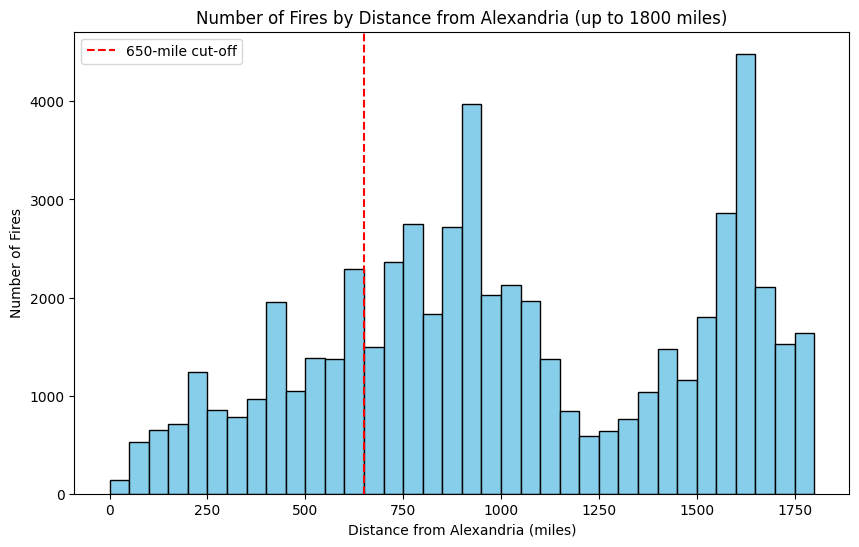

In [4]:
# Filter fires within 1800 miles and create bins for the histogram
distance_threshold = 1800
bin_width = 50
distance_bins = range(0, distance_threshold + bin_width, bin_width)

# Filter the data for fires within the 1800-mile range
filtered_distances = fire_info_df[fire_info_df['shortest_distance'] <= distance_threshold]

# Plot histogram of fire occurrences by distance
plt.figure(figsize=(10, 6))
plt.hist(filtered_distances['shortest_distance'], bins=distance_bins, color='skyblue', edgecolor='black')
plt.axvline(650, color='red', linestyle='--', label='650-mile cut-off')
plt.xlabel('Distance from Alexandria (miles)')
plt.ylabel('Number of Fires')
plt.title('Number of Fires by Distance from Alexandria (up to 1800 miles)')
plt.legend()
plt.show()

##### 2. Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from my city.

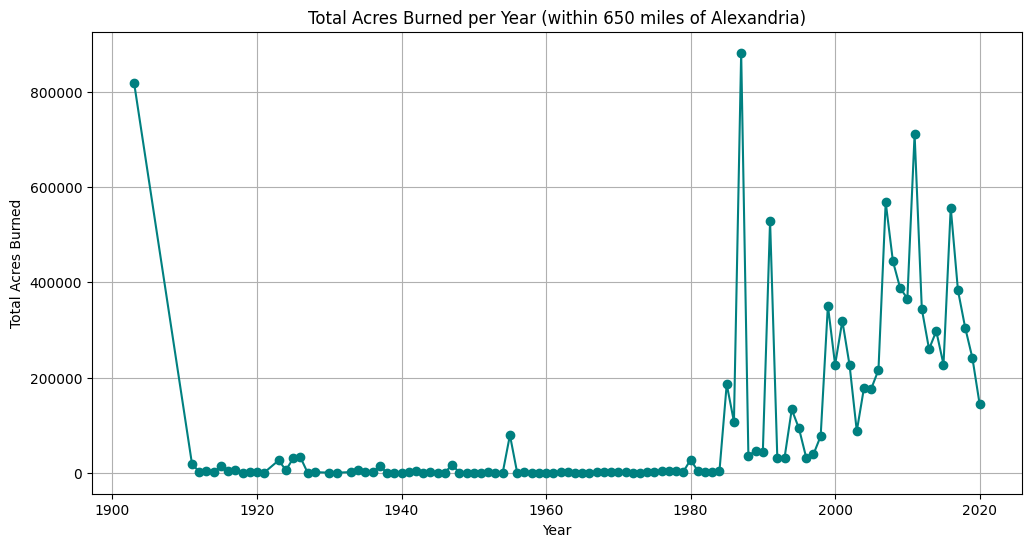

In [5]:
# Filter data for fires within 650 miles for time series analysis
distance_cutoff = 650
fires_within_cutoff = fire_info_df[fire_info_df['shortest_distance'] <= distance_cutoff]

# Group by year and calculate the total acres burned per year
annual_acres_burned = fires_within_cutoff.groupby('year')['size'].sum()

# Plot the time series of total acres burned per year
plt.figure(figsize=(12, 6))
plt.plot(annual_acres_burned.index, annual_acres_burned.values, marker='o', color='teal', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.title('Total Acres Burned per Year (within 650 miles of Alexandria)')
plt.grid(True)
plt.show()

Produce a time series graph containing my fire smoke estimates for my city and the AQI estimates for my city.

In [6]:
# read the smoke estimate and annual AQI csv stored

smoke_estimates_df = pd.read_csv("../intermediary_files/smoke_estimates.csv")
annual_AQI_df = pd.read_csv('../intermediary_files/final_AQI.csv')

In [9]:
annual_AQI_df.head()

,Unnamed: 0.1,Unnamed: 0,state_code,county_code,site_number,parameter_code,latitude,longitude,parameter,sample_duration,date_local,units_of_measure,arithmetic_mean,first_max_value,aqi,year
0,0,0,24,3,1003,42101,39.169533,-76.627933,Carbon monoxide,1 HOUR,1968-05-02,Parts per million,3.250000,4.0,3.250000,1968
1,1,1,24,3,1003,42101,39.169533,-76.627933,Carbon monoxide,1 HOUR,1968-05-03,Parts per million,1.363636,3.0,1.363636,1968
2,2,2,24,3,1003,42101,39.169533,-76.627933,Carbon monoxide,1 HOUR,1968-05-06,Parts per million,1.750000,3.0,1.750000,1968
3,3,3,24,3,1003,42101,39.169533,-76.627933,Carbon monoxide,1 HOUR,1968-05-07,Parts per million,1.583333,6.0,1.583333,1968
4,4,4,24,3,1003,42101,39.169533,-76.627933,Carbon monoxide,1 HOUR,1968-05-08,Parts per million,1.000000,9.0,1.000000,1968


In [10]:
smoke_estimates_df.head()

,Unnamed: 0.1,Unnamed: 0,year,name,size,type,circleness_scale,avg_distance,perimeter_start,shortest_distance,shortest_latlon,fire_type_encoded,smoke_estimate
0,13778,1961-13778-W_C_H_4_3_W1_61 (2),1961,W_C_H_4_3_W1_61 (2),28.693900,Wildfire,0.648984,426.356838,"(35.675731798257715, -83.71589029532807)",426.159008,"(35.67698964517509, -83.70966687469813)",5,0.193407
1,13792,1961-13792-FALL BRANC (2),1961,FALL BRANC (2),13.973044,Wildfire,0.580768,428.070862,"(35.658386536996765, -83.73666367421406)",427.994728,"(35.658889182769094, -83.7342160693799)",5,0.088211
2,13809,1961-13809-WORLEY KNO (2),1961,WORLEY KNO (2),6.655655,Wildfire,0.745906,420.876349,"(35.46030766855338, -83.41782178915307)",420.797336,"(35.460386527612144, -83.41673215456898)",5,0.049266
3,13810,1961-13810-CW_H_4_2_W12_61 (2),1961,CW_H_4_2_W12_61 (2),6.387265,Wildfire,0.761103,439.836810,"(35.60967334366376, -83.9442967311793)",439.793960,"(35.60967334366376, -83.9442967311793)",5,0.045788
4,13836,1961-13836-FOOTHILLS (2),1961,FOOTHILLS (2),1.527601,Wildfire,0.782713,435.545571,"(35.670698246564235, -83.90266194869604)",435.501251,"(35.671137177075195, -83.90149204817143)",5,0.011248


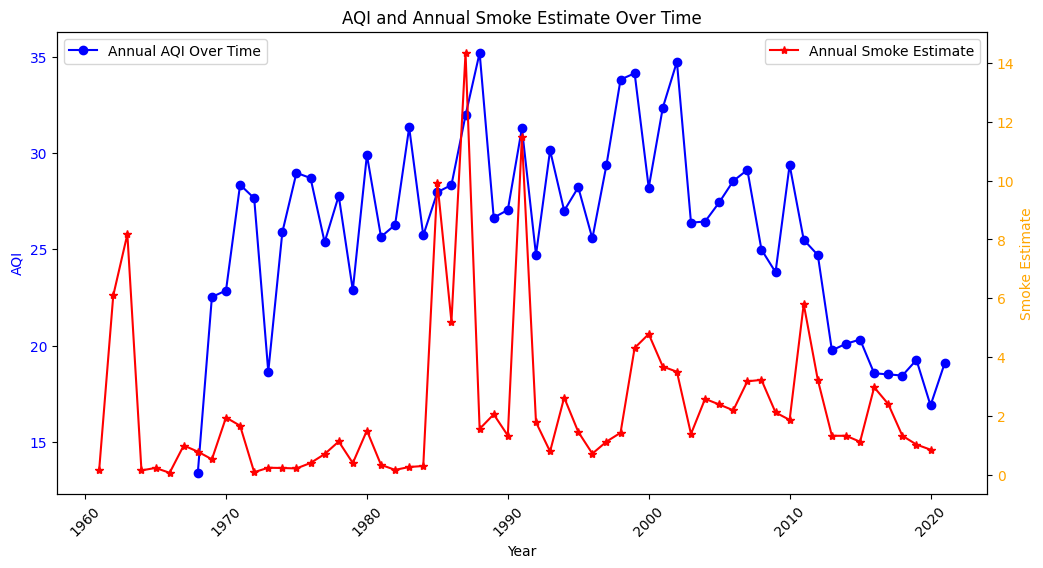

In [11]:
# Group by year to calculate annual averages
annual_aqi = annual_AQI_df[['year', 'aqi']].groupby('year')['aqi'].mean()
annual_smoke_estimate = smoke_estimates_df[['year', 'smoke_estimate']].groupby('year')['smoke_estimate'].mean()

# Plotting both AQI over time and annual smoke estimate on the same plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot AQI on the primary y-axis
ax1.plot(annual_aqi.index, annual_aqi, marker = 'o', label='Annual AQI Over Time', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('AQI', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('AQI and Annual Smoke Estimate Over Time')
ax1.tick_params(axis='x', rotation=45)

# Use the secondary y-axis to plot the annual smoke estimate
ax2 = ax1.twinx()
ax2.plot(annual_smoke_estimate.index, annual_smoke_estimate, marker = '*', label='Annual Smoke Estimate', color='red')
ax2.set_ylabel('Smoke Estimate', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()